# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

Ce TD a été développé avec l'aide de :
- Sanae Lofti, candidate à la maîtrise,
- Amine Bellahsen, candidat à la maîtrise.<br/>

Avant d'exécuter ce code, vous devrez récupérer les images des visages déjà partitionnées en échantillon d'apprentissage et de test. Il s'agit du fichier nommé *FacialRecognitionData.zip* disponible dans la section Jeu de données. Decrompressez le fichier dans le répertoire du notebook.

Les images proviennent du jeu de données publiques *The Extended Yale Face Database B* disponible sur le site http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html.


## TD4 : Reconnaissance faciale avec l'analyse en composantes principales


Nous utiliserons des images récupérées de la base de données publique de Yale$^{(1)}$ que vous pouvez trouver sur Moodle. Nous avons choisi les 2 ensembles de telle sorte que l'ensemble de test contienne à la fois des images déjà vues et d'autres tout-à-fait nouvelles. L'objectif final est de mesurer la performance de notre algorithme en comptant le nombre d'exemples bien classifiés.

Plusieurs librairies que nous n'utilisons pas régulièrement dans le cours sont nécessaire. Exécutez la prochaine cellule de code pour installer ces librairies.

In [11]:
# using Pkg
# Pkg.add(["Images","Netpbm","ImageMagick","QuartzImageIO","Colors"])

In [12]:
# Librairies standards du cours
using Statistics, LinearAlgebra, Gadfly, DataFrames

# Librairie pour le traitement des images
using Images, Netpbm, ImageMagick, QuartzImageIO, Colors


# 1. Chargement des images d'entraînement
___

Les images d'entraînement sont contenues dans le dossier *Train* du jeu de données que vous pouvez récupérer sur Moodle. L'ensemble d'entraînement est constitué de 784 images provenant de 28 personnes différente, soit de 28 images par personne.

Les visages des images sont déjà alignés ce qui nous permet de nous concentrer sur la reconnaissance des visages.







In [13]:
# Récupération de tous les noms de fichiers de l'échantillon d'entraînement
file = readdir("Train")
trainFileName = ["Train/"*file[i] for i=1:length(file)];

,,,,,,,

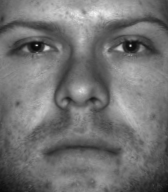
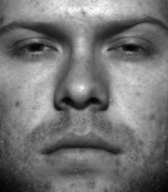
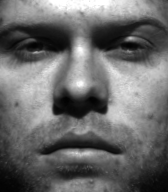
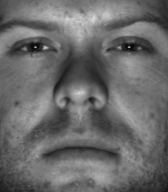
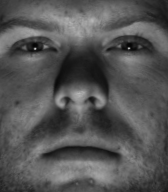
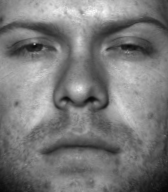
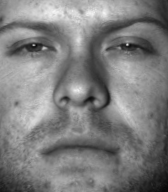
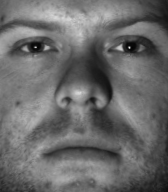

In [14]:
# Affichage des 8 photos de la première personne
load.(trainFileName[1:8])

,,,,,,,

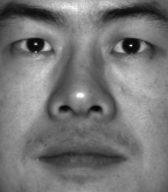
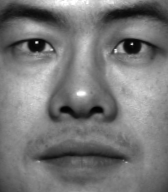
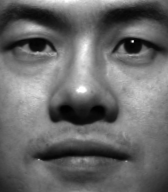
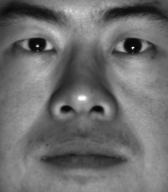
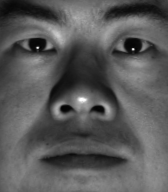
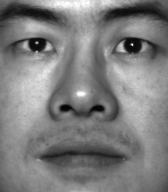
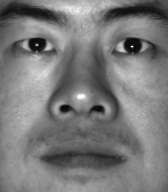
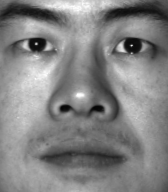

In [15]:
# Affichage des 8 photos de la huitième personne
load.(trainFileName[29:36])

In [16]:
"""
    imgrayconvert(imageFileName ; columnStack=true ; T=Int64)

Conversion en intensité de gris de l'image du fichier `imageFileName`.

### Arguments
- `imageFileName::string` : le nom du fichier de l'image
- `columnStack::bool=true` : Si `true`, l'image est renvoyée comme un vecteur ligne (option par défaut) sinon la fonction rencvoie la matrice des niveaux de gris.
- `T::DataType=Int64` : Type des éléments de la matrice (Int64 par défaut).

### Details
 
La fonction retourne la matrice ou le vecteur colonne des niveaux de gris.
 
### Examples

\```
 julia> imgrayconvert(imageFileName)
 julia> imgrayconvert(imageFileName ; columnStack=false)
 julia> imgrayconvert(imageFileName ; T=Float64)
\```

"""
function imgrayconvert(imageFileName::String ; columnStack::Bool=true , T::DataType = Int64 )
    im = load(imageFileName)
    X = convert(Array{T},channelview(im))
    if columnStack
        Y = X[:]
    else
        Y = X
    end
    return Y
end

imgrayconvert

In [17]:
"""
    imshow(X), imshow(X, im_size)

Affiche une matrice ou un vecteur en une image composée de niveau de gris.

### Arguments
- `X::Array{Real}` : Une matrice ou un vecteur colonne à afficher.
- `im_size::Tuple{Int64,Int64}` : Un tuple de Int64 indicant la taille de l'image. L'argument est nécessaire si un vecteur est envoyé.

### Details
 
L'échelle des niveaux de gris
est ajustée en fonction des valeurs contenues dans X.
 
### Examples

\```
 julia> imshow(X)
 julia> imshow(X, (m₁, m₂))
\```

"""
function imshow(X::Array{<:Real,1}, im_size::Tuple{Int64,Int64})
    
    # scale the eigenvector for display on grayscale
    m = minimum(X)
    M = maximum(X)
    
    Z = (X .- m) / (M-m)
    
    Z = reshape(Z, im_size)

    Gray.(Z)
    
end

function imshow(X::Array{<:Real,2})
    
    # scale the eigenvector for display on grayscale
    m = minimum(X)
    M = maximum(X)
    
    Z = (X .- m) / (M-m)
    
    Gray.(Z)
    
end

imshow (generic function with 2 methods)

In [18]:
# Chargement des images de l'ensemble d'entrainement. Chaque image correspond à une colonne de la matrice X.

n = length(trainFileName)

im = imgrayconvert(trainFileName[1],columnStack=false)
m₁, m₂ = size(im)
m = m₁ * m₂

X = Array{Float64,2}(undef,m,n)

for i=1:n
   X[:,i] = imgrayconvert(trainFileName[i], columnStack=true) 
end


# 2. Analyse en composantes principales

Le but de cette section est de réduire la dimension du jeu de données d'entraînement. Nous ferons donc une décomposition en valeurs singulières de l'ensemble d'entraînement.

Les étapes sont les suivantes :
1. Centrer chacune des lignes de la matrice des visages d'entraînement pour obtenir la matrice $Z$.
2. Effectuer une décomposition en valeurs singulières de $Z$.
3. Choisir le nombre de composantes principales requises $k$. 

### 2.1 Centrer les images de l'ensemble d'entraînement

Calculer le visage moyen $\bar{X}$ en faisait une moyenne de tous les visages pour chacun des pixels. Affichez le visage moyen avec la fonction `imshow`.

In [ ]:
X̄ = vec(mean(X,dims=2))

X̄ = Int64.(round.(X̄))

imshow(X̄, (m₁, m₂))

Calculer la matrice $Z$ centrée des visages de l'ensemble d'entraînement. Ensuite, afficher la différence entre le visage moyen et le premier visage avec la fonction `imshow`.

In [ ]:
Z = X .- X̄

imshow(Z[:,1], (m₁, m₂))

### 2.2 Effectuer une décomposition en valeurs singulières de $Z$.

Obtenez les matrices $U$ et $V$ ainsi que les valeurs singulières à l'aide de la fonction `svd` et/ou de la fonction `svdvals`.

In [ ]:
γ = svdvals(Z)
F = svd(Z)
V = F.V
U = F.U

Affichez les premiers vecteurs singuliers de $U$ avec la fonction `imshow`. Ces composantes représentent les modes de plus grande variabilité. Dans la reconnaissance faciale, elles sont appelées les *eigenfaces*.

In [ ]:
[imshow(U[:,i], (m₁, m₂)) for i=1:8]

### 2.3 Choisir le nombre $k$ de composantes principales

Tracez un graphique permettant de voir le pourcentage de la variance totale retenue en fonction du nombre de composantes principales.

In [ ]:
cumvar = cumsum(γ.^2)

ratio = cumvar / cumvar[end]

df = DataFrame(k = Int64[], Variance = Float64[])

for k in 1:length(ratio)
    push!(df, [k, ratio[k]])
end

plot(df, x=:k, y=:Variance, Geom.line)

Calculez le pourcentage de la variance récupérée en utilisant 10, 50 et 70 copmosantes principales.

In [ ]:
ratio[[10,50,70]]

# 3. Approximation d'une image à l'aide des composantes principales

Soit $k$ le nombre de composantes principales retenues. Nous allons approximer le visage $i$ des $k$ composantes principales retenues. 

Dénotons par $U_k$ les $k$ premiers vecteurs propres de $U$. On cherche à trouver la combinaison linéaire des $k$ vecteurs qui approxime le visage $i$ $\mathbf{z}_i$ :

$$ \mathbf{z}_i = U_k \mathbf{w} ; $$

où $\mathbf{w}$ correspond au vecteur des poids de la combinaison linéaire. Le vecteur des poids $\mathbf{w}$ peut être obtenu de la façon suivante :

$$ \mathbf{w} = U_k^\top \mathbf{z}_i. $$

Par conséquent, le visage $i$ peut être projeté dans l'espace des $k$ premières composantes principales de la façon suivante :

$$ \mathbf{\tilde{z}}_i = U_k \mathbf{w} =  U_k  U_k^\top \mathbf{z}_i = P_k \mathbf{z}_i ; $$

où $P_k = U_k  U_k^\top$ est la matrice de projection. De façon numérique, il est cependant plus rapide de faire la projection en deux étapes :
1. Caluler les poids $\mathbf{w}$.
2. Obtenir l'approximation de l'image $\mathbf{\tilde{z}}_i$.



Approximez le visage 1 à l'aide des 10 premières composantes principales et affichez l'approximation à l'aide de la fonction `imshow`.

In [ ]:
i = 1
k = 10

Uk = U[:,1:k]

w = Uk'*Z[:,i] # calcul des poids
z̃ = Uk*w       # calcul de l'approximation de l'image

# Affichage de l'image originale et de l'approximation
[imshow(X[:,i],(m₁, m₂)) imshow(z̃ .+ X̄, (m₁, m₂))]

Approximez le visage 1 à l'aide des 50 premières composantes principales et affichez l'approximation à l'aide de la fonction `imshow`.

In [ ]:
i = 1
k = 50

Uk = U[:,1:k]

w = Uk'*Z[:,i] # calcul des poids
z̃ = Uk*w       # calcul de l'approximation de l'image

# Affichage de l'image originale et de l'approximation
[imshow(X[:,i],(m₁, m₂)) imshow(z̃ .+ X̄, (m₁, m₂))]

Approximez le visage 1 à l'aide des 70 premières composantes principales et affichez l'approximation à l'aide de la fonction `imshow`.

In [ ]:
i = 1
k = 70

Uk = U[:,1:k]

w = Uk'*Z[:,i] # calcul des poids
z̃ = Uk*w       # calcul de l'approximation de l'image

# Affichage de l'image originale et de l'approximation
[imshow(X[:,i],(m₁, m₂)) imshow(z̃ .+ X̄, (m₁, m₂))]

# 4. Reconnaissance faciale

L'idée de la reconnaissance faciale consiste à comparer le vecteur poids de l'image à reconnaître avec les vecteurs poids des images de l'ensemble d'entraînement. 

1. Calculez les poids de toutes les images de l'ensemble d'entraînement.
2. Calculez les poids de l'image de test.
3. Calculez la distance entre les vecteurs poids des images d'entraînement et celui de l'image de test.
4. Identifiez l'image de l'ensemble d'entraînement la plus proche de l'image de test.
5. Décidez si le visage se retrouve dans l'échantillon d'entraînement ou s'il est inconnu.

### 4.1 Calculez les poids de toutes les images de l'ensemble d'entraînement

Prenez pour l'instant $k = 50$ composantes.

In [ ]:
k = 50

Uk = U[:,1:k]

W = Uk'*Z

### 4.2 Calculez les poids de l'image de test

Prenons d'abord la première image de l'échantillon de test. Il faut charger l'image, retirer le visage moyen et calculer les poids.


In [ ]:
# Récupération de tous les noms de fichiers de l'échantillon d'entraînement
file = readdir("Test")
testFileName = ["Test/"*file[i] for i=1:length(file)];

In [ ]:
# conversion de l'image de test en intensités de gris et retrait du visage moyen

j = 1  # j^e image de l'échantillon de test

y = imgrayconvert(testFileName[j]) - X̄

In [ ]:
# Calcul des poids de l'image de l'échantillon de test
w̃ = Uk'*y

### 4.3 Calculez la distance entre les vecteurs poids des images d'entraînement et celui de l'image de test.

In [ ]:
d = sum( (W .- w̃).^2, dims=1 )

### 4.4 Identifiez l'image de l'ensemble d'entraînement la plus proche de l'image de test.

In [ ]:
minval, ind = findmin(d)
ind = ind[2]

[load(testFileName[j]) load(trainFileName[ind])]

### 4.5 Décidez si le visage se retrouve dans l'échantillon d'entraînement ou s'il est inconnu.

Si la distance minimale entre les poids des images d'entraînement et des poids de l'image de test, alors on statuera que le visage est inconnu. Il faut définir cependant définir ce seuil à l'aide de la validation croisée. Tentez d'utiliser le seuil de (3500)^2 et refaites les étapes du numéro 4 avec les autres images de l'ensemble de test.  

In [ ]:
if minval > 3500^2
    println("Le visage est inconnu.")
else
    println("Le visage est connu.")
end

In [ ]:
# # Récupération des noms des personnes sur les images de l'ensemble d'entraînement
# ind1 = findfirst(isequal('/'),trainFileName[1])
# ind2 = findfirst(isequal('_'),trainFileName[1])
# trainPerson = [trainFileName[i][ind1+1:ind2-1] for i=1:length(trainFileName)];
